In [1]:
# import general packages
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from tqdm import tqdm

In [2]:
# Import stochastic modele from repository
import sys
sys.path.append('..')
from SC_models.mutation import clonal_evolution

# Modelling the evolution of mutations acquired in SCs

100%|██████████| 10000/10000 [00:14<00:00, 697.31it/s]


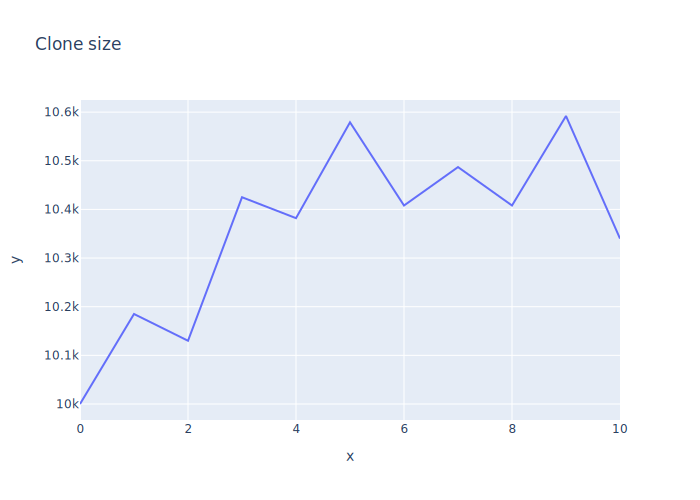

KeyboardInterrupt: 

In [3]:
# Set number of initial cells to be simulated
init_cells = 10_000

# Simulate the cell trajectories
clone_track = []
for i in tqdm(range(init_cells)):
    clone_track.append(clonal_evolution(tmax=10))

# Compute total number of cells in the system at each year
total_cells = np.array([clone[:, 0] for clone in clone_track])
total_cells = total_cells.sum(axis=0)

# Plot total cells in the system
fig_total_cells = px.line(title='Clone size',
                          x=list(range(total_cells.shape[0])),
                          y=total_cells)
fig_total_cells.show(renderer='svg')


# Plot mutational trajectories
fig = go.Figure()
for clone in clone_track:
    x = list(range(clone.shape[0]))
    for i in range(clone.shape[1]):
        fig.add_trace(
            go.Scatter(x=x, y=clone[:,i]))
fig.show(renderer="svg")